In [99]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [100]:
df=pd.read_csv("New-ImmoElliza.csv")
df.head(10)

,Unnamed: 0,House_Type,Price,Serface,No. of Bed-Room,AtticExists,TerraceExists,SwimmingPoolExists
0,0,house,1325000.0,800.0,6.0,0,1,0
1,1,house,338744.0,370.0,3.0,0,0,0
2,2,house,2950000.0,180.0,2.0,0,1,0
3,7,house,338215.0,406.0,3.0,0,0,0
4,8,house,301322.0,420.0,3.0,0,0,0
5,9,house,310210.0,344.0,3.0,0,0,0
6,10,house,342866.0,993.0,3.0,1,0,0
7,12,house,316748.0,341.0,3.0,0,0,0
8,13,house,320548.0,394.0,3.0,0,0,0
9,14,house,266885.0,341.0,3.0,0,0,0


In [101]:
# drop column
df = df.drop(['Unnamed: 0'], axis = 1)
df.head(10)

,House_Type,Price,Serface,No. of Bed-Room,AtticExists,TerraceExists,SwimmingPoolExists
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
3,house,338215.0,406.0,3.0,0,0,0
4,house,301322.0,420.0,3.0,0,0,0
5,house,310210.0,344.0,3.0,0,0,0
6,house,342866.0,993.0,3.0,1,0,0
7,house,316748.0,341.0,3.0,0,0,0
8,house,320548.0,394.0,3.0,0,0,0
9,house,266885.0,341.0,3.0,0,0,0


In [102]:
# Selecting independent variable
X= df.iloc[:,2:]
X

,Serface,No. of Bed-Room,AtticExists,TerraceExists,SwimmingPoolExists
0,800.0,6.0,0,1,0
1,370.0,3.0,0,0,0
2,180.0,2.0,0,1,0
3,406.0,3.0,0,0,0
4,420.0,3.0,0,0,0
...,...,...,...,...,...
5494,361.0,3.0,0,1,0
5495,1032.0,4.0,0,0,0
5496,219.0,3.0,0,0,0
5497,238.0,3.0,1,0,0


In [104]:
# Selecting independent variable
X= df.iloc[:,2:]
X


,Serface,No. of Bed-Room,AtticExists,TerraceExists,SwimmingPoolExists
0,800.0,6.0,0,1,0
1,370.0,3.0,0,0,0
2,180.0,2.0,0,1,0
3,406.0,3.0,0,0,0
4,420.0,3.0,0,0,0
...,...,...,...,...,...
5494,361.0,3.0,0,1,0
5495,1032.0,4.0,0,0,0
5496,219.0,3.0,0,0,0
5497,238.0,3.0,1,0,0


In [105]:
#Selecting dependent variable
y= df.iloc[:,1]
y

0       1325000.0
1        338744.0
2       2950000.0
3        338215.0
4        301322.0
          ...    
5494     265000.0
5495     349000.0
5496     304900.0
5497     225000.0
5498     225000.0
Name: Price, Length: 5499, dtype: float64

In [74]:
# Splitting data into train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


(4399, 5)
(1100, 5)


In [75]:
print(y_train.shape)
print(y_test.shape)


(4399,)
(1100,)


In [76]:
'''# feature scaling:standarding the dataset

from sklearn.preprocessing import StandardScaler 

# fitting  and transforming the training dataset.

st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)'''

'# feature scaling:standarding the dataset\n\nfrom sklearn.preprocessing import StandardScaler \n\n# fitting  and transforming the training dataset.\n\nst_x= StandardScaler()  \nX_train= st_x.fit_transform(X_train)'

In [77]:
'''# fitting  and transforming the test dataset
X_test= st_x.transform(X_test)'''

'# fitting  and transforming the test dataset\nX_test= st_x.transform(X_test)'

In [78]:
'''from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import MinMaxScaler #fixed import\n\nscaler = MinMaxScaler()\nX_train= scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [79]:
# Create linear regression object
regr = linear_model.LinearRegression()


In [80]:
# Train the model using the training sets
regr.fit(X_train, y_train)


LinearRegression()

In [89]:

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)


[354416.87914101 297154.55477776 355835.75427378 ... 419013.8422556
 428912.27296833 496005.73789879]


In [90]:
# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 1.79604447e+01  6.17053315e+04 -7.09504089e+04  6.90713395e+04
  6.31830462e+05]


In [91]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 221885367715.58


In [92]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficient of determination: 0.43


In [93]:
print(y_test.shape)

(1100,)


In [94]:
print(X_test.shape)

(1100, 5)


In [95]:
print(y_pred.shape)

(1100,)


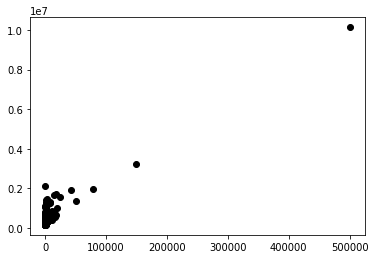

In [96]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X_test['Serface'],y_pred, color="black")
#plt.plot(X_test['Serface'], y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()